In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r"E:\ny_housing_project\data\NY-House-Dataset-Cleaned.csv")


In [139]:
df.head()

BROKERTITLE      PRICE  BEDS       BATH  PROPERTYSQFT  \
0  douglas elliman     315000     2   2.000000        1400.0   
1          serhant  195000000     7  10.000000       17545.0   
2       sowae corp     260000     4   2.000000        2015.0   
3          compass      69000     3   1.000000         445.0   
4        sotheby's   55000000     7   2.373861       14175.0   

                                   FORMATTED_ADDRESS   LATITUDE  LONGITUDE  \
0  Regis Residence, 2 E 55th St #803, New York, N...  40.761255 -73.974483   
1             217 W 57th St, New York, NY 10019, USA  40.766393 -73.980991   
2     620 Sinclair Ave, Staten Island, NY 10312, USA  40.541805 -74.196109   
3               2 E 55th St, New York, NY 10022, USA  40.761398 -73.974613   
4               5 E 64th St, New York, NY 10065, USA  40.767224 -73.969856   

    STATUS PROPERTY_TYPE  segment    BOROUGH    ZIP  
0  unknown         condo   Normal  Manhattan  10022  
1  unknown         condo   Luxury  Manhattan  10019  
2  unknown         house   Normal  Manhattan  10312  
3  unknown         condo  Outlier  Manhattan  10022  
4  unknown     townhouse   Luxury  Manhattan  10065

In [140]:
df_normal = df[df['segment'] == 'Normal']
df_luxury = df[df['segment'] == 'Luxury']
df_Outlier  = df[df['segment'] == 'Outlier']

In [141]:
df_normal['BOROUGH'].value_counts()

BOROUGH
Manhattan        2870
Queens            532
Brooklyn          437
Bronx             152
Staten Island      55
Name: count, dtype: int64

In [142]:
df_normal

BROKERTITLE    PRICE  BEDS  BATH  PROPERTYSQFT  \
0     douglas elliman   315000     2   2.0   1400.000000   
2          sowae corp   260000     4   2.0   2015.000000   
6     douglas elliman   899500     2   2.0   2184.207862   
8        pantiga  inc   265000     1   1.0    750.000000   
9       century 21 mk   440000     2   1.0    978.000000   
...               ...      ...   ...   ...           ...   
4544          compass   599000     1   1.0   2184.207862   
4545  mjr real estate   245000     1   1.0   2184.207862   
4546  douglas elliman  1275000     1   1.0   2184.207862   
4547          e  corp   598125     2   1.0    655.000000   
4548      nyc brokers   349000     1   1.0    750.000000   

                                      FORMATTED_ADDRESS   LATITUDE  LONGITUDE  \
0     Regis Residence, 2 E 55th St #803, New York, N...  40.761255 -73.974483   
2        620 Sinclair Ave, Staten Island, NY 10312, USA  40.541805 -74.196109   
6           157 W 126th St #1b, New York, NY 10027, USA  40.809448 -73.946777   
8     Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...  40.821586 -73.874089   
9          1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA  40.615738 -73.969694   
...                                                 ...        ...        ...   
4544         222 E 80th St #3a, New York, NY 10075, USA  40.774350 -73.955879   
4545            97-40 62nd Dr, Rego Park, NY 11374, USA  40.732538 -73.860152   
4546             427 W 21st St, New York, NY 10011, USA  40.745882 -74.003398   
4547     91-23 Corona Ave. #4b, Flushing, NY 11373, USA  40.742770 -73.872752   
4548      460 Neptune Ave #14a, Brooklyn, NY 11224, USA  40.579147 -73.970949   

       STATUS PROPERTY_TYPE segment    BOROUGH    ZIP  
0     unknown         condo  Normal  Manhattan  10022  
2     unknown         house  Normal  Manhattan  10312  
6     unknown         condo  Normal  Manhattan  10027  
8     unknown         co op  Normal      Bronx  10473  
9     unknown         co op  Normal   Brooklyn  11230  
...       ...           ...     ...        ...    ...  
4544  unknown         co op  Normal  Manhattan  10075  
4545  unknown         co op  Normal  Manhattan  11374  
4546  unknown         co op  Normal  Manhattan  10011  
4547  unknown         condo  Normal     Queens  11373  
4548  unknown         co op  Normal   Brooklyn  11224  

[4046 rows x 13 columns]

# 1. Exploratory Data Analysis (EDA)

## 2.1. Univariate Analysis


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\1565403127.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



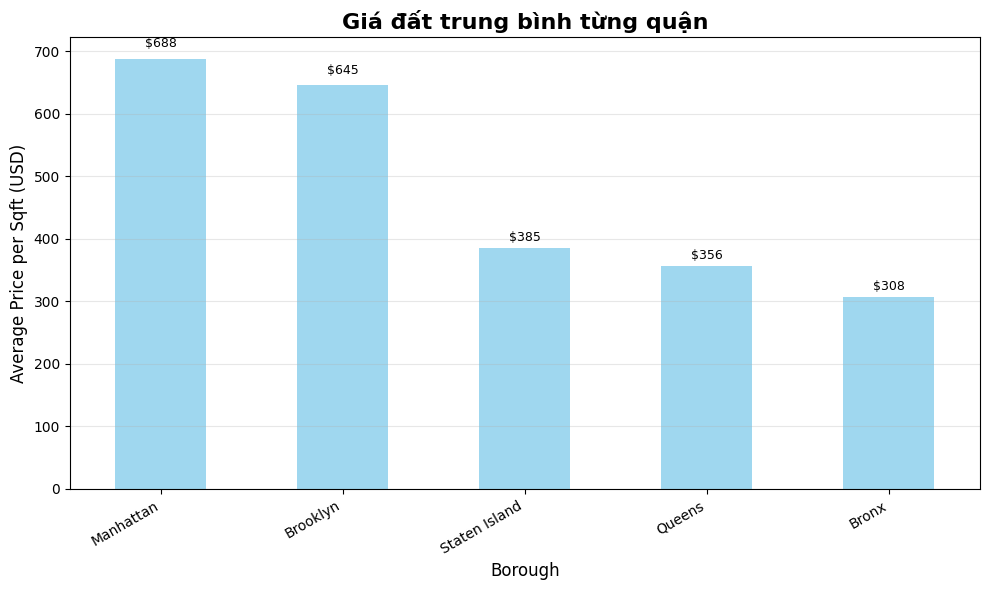

BOROUGH
Manhattan        687.90
Brooklyn         645.46
Staten Island    384.59
Queens           356.01
Bronx            307.62
Name: PRICE_PER_SQFT, dtype: float64


In [143]:
df_normal['PRICE_PER_SQFT'] = df_normal['PRICE'] / df_normal['PROPERTYSQFT']

# lo·∫°i b·ªè c√°c d√≤ng kh√¥ng h·ª£p l·ªá
df_normal = df_normal.dropna(subset=['PRICE_PER_SQFT'])
df_normal = df_normal[df_normal['PRICE_PER_SQFT'] > 0]
# t√≠nh trung b√¨nh theo qu·∫≠n
price_sqft_by_borough = df_normal.groupby('BOROUGH')['PRICE_PER_SQFT'].mean().sort_values(ascending=False)

# v·∫Ω bar chart
plt.figure(figsize=(10,6))
price_sqft_by_borough.plot(kind='bar', color='skyblue', alpha=0.8)

plt.title("Gi√° ƒë·∫•t trung b√¨nh t·ª´ng qu·∫≠n", fontsize=16, fontweight='bold')
plt.ylabel("Average Price per Sqft (USD)", fontsize=12)
plt.xlabel("Borough", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)

# th√™m label tr√™n c·ªôt
for i, val in enumerate(price_sqft_by_borough):
    plt.text(i, val * 1.02, f"${val:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(price_sqft_by_borough.round(2))


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\3671596279.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



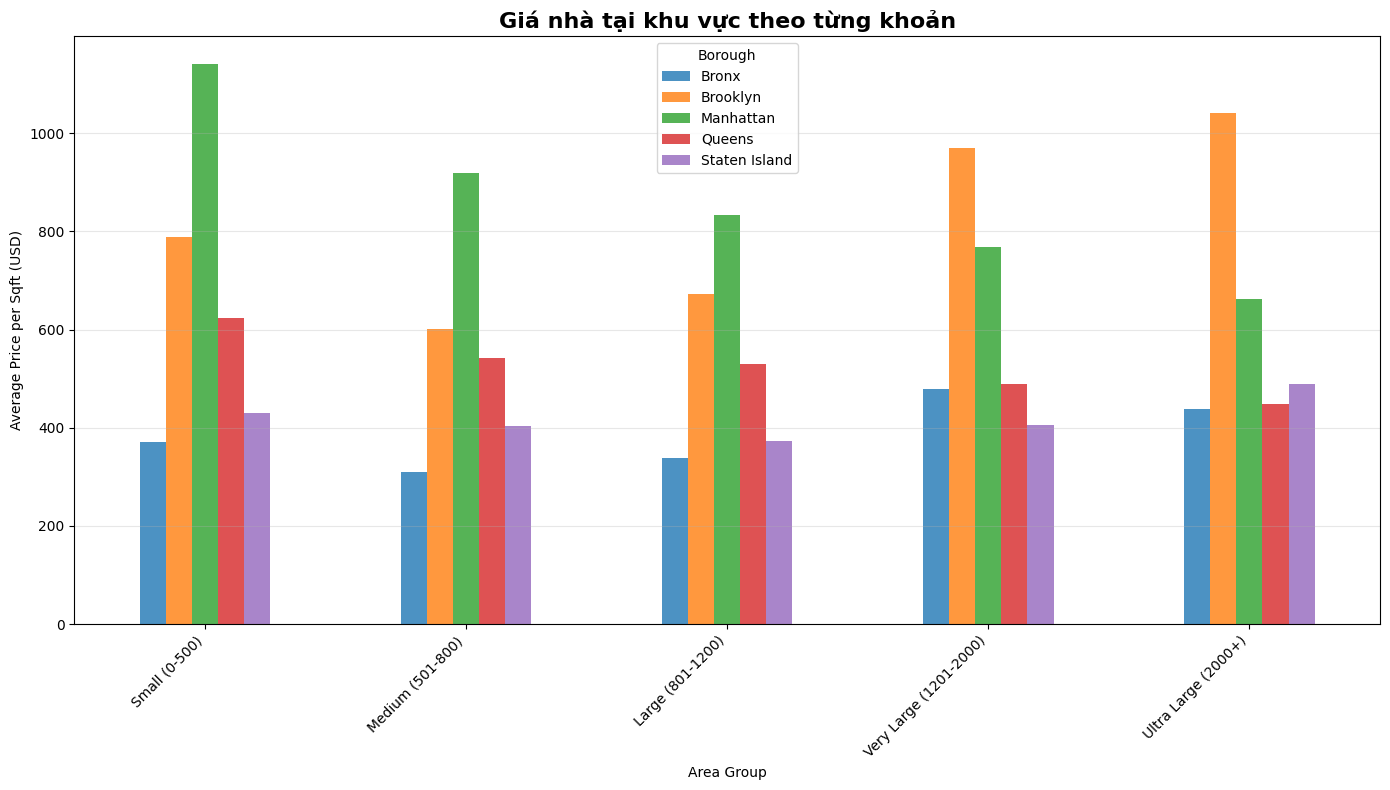

AreaGroup     Small (0-500) Medium (501-800) Large (801-1200)  \
BOROUGH                                                         
Bronx                 370.0       310.266186       338.682625   
Brooklyn         789.188354        600.95967       672.496554   
Manhattan        1139.81617       917.637333       832.633288   
Queens           622.816153       542.562266       529.738612   
Staten Island    429.236106        404.05912       372.255734   

AreaGroup     Very Large (1201-2000) Ultra Large (2000+)  
BOROUGH                                                   
Bronx                     479.594279          437.605452  
Brooklyn                  968.813711          1041.43859  
Manhattan                 768.065355          661.938956  
Queens                    488.922856          448.699764  
Staten Island             406.428099           488.80265  


In [144]:

df_clean = df_normal.copy()
df_clean['PROPERTYSQFT'] = df_clean['PROPERTYSQFT'].replace(2184.207862, pd.NA)
df_clean['PRICE_PER_SQFT'] = df_clean['PRICE'] / df_clean['PROPERTYSQFT']
df_clean = df_clean.dropna(subset=['PRICE_PER_SQFT'])
df_clean = df_clean[df_clean['PRICE_PER_SQFT'] > 0]

df_clean['AreaGroup'] = pd.cut(
    df_clean['PROPERTYSQFT'],
    bins=[0, 500, 800, 1200, 2000, float('inf')],
    labels=['Small (0-500)', 'Medium (501-800)', 'Large (801-1200)', 
            'Very Large (1201-2000)', 'Ultra Large (2000+)']
)

price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()

price_sqft_grouped.T.plot(kind='bar', figsize=(14, 8), alpha=0.8)

plt.title("Gi√° nh√† t·∫°i khu v·ª±c theo t·ª´ng kho·∫£n", fontsize=16, fontweight='bold')
plt.ylabel("Average Price per Sqft (USD)")
plt.xlabel("Area Group")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Borough")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(price_sqft_grouped.round(2))


In [145]:
# Gi√° trung b√¨nh / sqft theo qu·∫≠n & nh√≥m di·ªán t√≠ch
price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()

print("Average Price per Sqft by Borough and Area Group:")
print(price_sqft_grouped.round(2))

# T√≠nh t·ª∑ l·ªá % thay ƒë·ªïi gi·ªØa c√°c nh√≥m di·ªán t√≠ch
price_sqft_change = price_sqft_grouped.pct_change(axis=1) * 100

print("\nPercentage change compared to previous Area Group:")
print(price_sqft_change.fillna('-').round(1))


Average Price per Sqft by Borough and Area Group:
AreaGroup     Small (0-500) Medium (501-800) Large (801-1200)  \
BOROUGH                                                         
Bronx                 370.0       310.266186       338.682625   
Brooklyn         789.188354        600.95967       672.496554   
Manhattan        1139.81617       917.637333       832.633288   
Queens           622.816153       542.562266       529.738612   
Staten Island    429.236106        404.05912       372.255734   

AreaGroup     Very Large (1201-2000) Ultra Large (2000+)  
BOROUGH                                                   
Bronx                     479.594279          437.605452  
Brooklyn                  968.813711          1041.43859  
Manhattan                 768.065355          661.938956  
Queens                    488.922856          448.699764  
Staten Island             406.428099           488.80265  

Percentage change compared to previous Area Group:
AreaGroup     Small (0-500)  

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\683740668.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\683740668.py:8: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



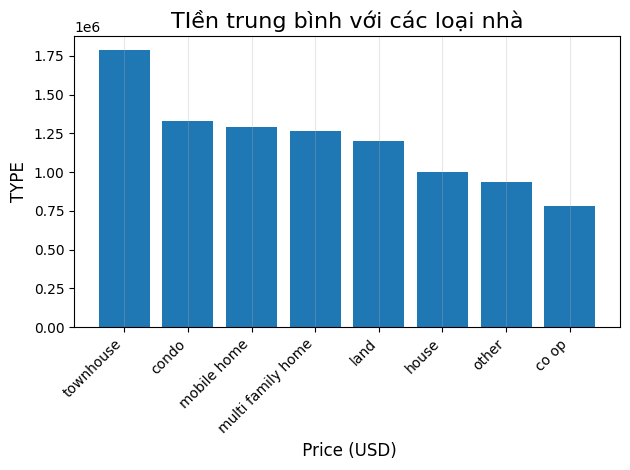

In [146]:
avg_type = df_normal.groupby("PROPERTY_TYPE")['PRICE'].mean().reset_index()
avg_type = avg_type.sort_values(by = "PRICE",ascending=False)
avg_type
plt.bar(avg_type['PROPERTY_TYPE'],avg_type['PRICE'])
plt.xticks(rotation=45, ha='right')
plt.title('TI·ªÅn trung b√¨nh v·ªõi c√°c lo·∫°i nh√†', fontsize=16)
plt.xlabel(' Price (USD)', fontsize=12)
plt.ylabel('TYPE', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\4036172886.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



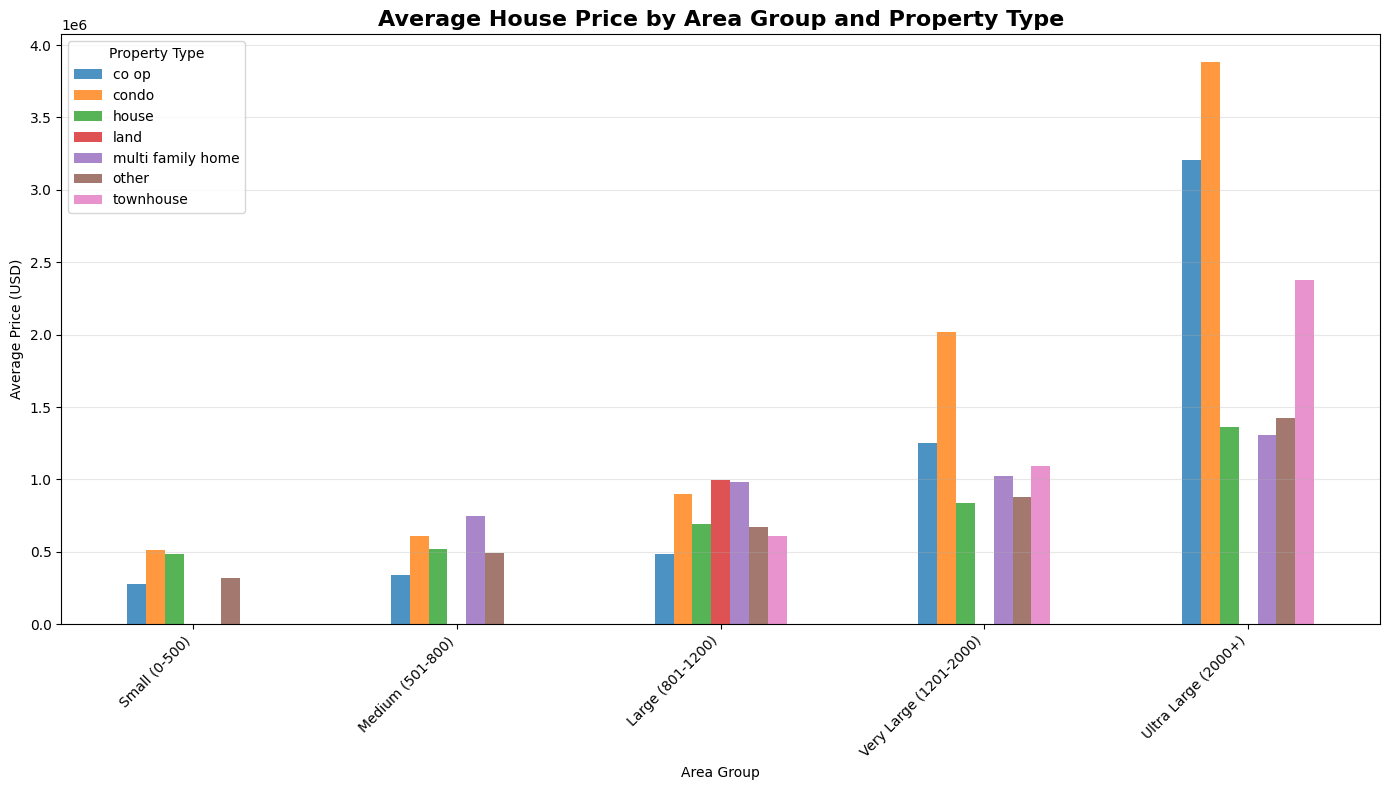

PROPERTY_TYPE                co op       condo       house      land  \
AreaGroup                                                              
Small (0-500)            275606.03   513999.96   482250.00       NaN   
Medium (501-800)         339016.60   609570.69   518533.20       NaN   
Large (801-1200)         487392.20   902567.64   691458.21  999000.0   
Very Large (1201-2000)  1251530.43  2015847.61   840760.96       NaN   
Ultra Large (2000+)     3208531.25  3880321.98  1360096.30       NaN   

PROPERTY_TYPE           multi family home       other   townhouse  
AreaGroup                                                          
Small (0-500)                         NaN   319126.71         NaN  
Medium (501-800)                750000.00   490142.35         NaN  
Large (801-1200)                979200.00   668912.21   607979.27  
Very Large (1201-2000)         1022282.80   875684.88  1090795.38  
Ultra Large (2000+)            1307486.06  1422665.64  2376495.77  


In [147]:

price_by_area_type = df_clean.groupby(['AreaGroup', 'PROPERTY_TYPE'])['PRICE'].mean().unstack()

# v·∫Ω chart
price_by_area_type.plot(kind='bar', figsize=(14, 8), alpha=0.8)

plt.title('Average House Price by Area Group and Property Type', fontsize=16, fontweight='bold')
plt.xlabel('Area Group')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Property Type')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(price_by_area_type.round(2))


In [148]:

print("Average Price per Sqft by Borough and Area Group:")
print(price_by_area_type.round(2))

# T√≠nh t·ª∑ l·ªá % thay ƒë·ªïi gi·ªØa c√°c nh√≥m di·ªán t√≠ch
price_sqft_change = price_by_area_type.pct_change(axis=1) * 100

print("\nPercentage change compared to previous Area Group:")
print(price_sqft_change.fillna('-').round(1))


Average Price per Sqft by Borough and Area Group:
PROPERTY_TYPE                co op       condo       house      land  \
AreaGroup                                                              
Small (0-500)            275606.03   513999.96   482250.00       NaN   
Medium (501-800)         339016.60   609570.69   518533.20       NaN   
Large (801-1200)         487392.20   902567.64   691458.21  999000.0   
Very Large (1201-2000)  1251530.43  2015847.61   840760.96       NaN   
Ultra Large (2000+)     3208531.25  3880321.98  1360096.30       NaN   

PROPERTY_TYPE           multi family home       other   townhouse  
AreaGroup                                                          
Small (0-500)                         NaN   319126.71         NaN  
Medium (501-800)                750000.00   490142.35         NaN  
Large (801-1200)                979200.00   668912.21   607979.27  
Very Large (1201-2000)         1022282.80   875684.88  1090795.38  
Ultra Large (2000+)            130748

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\3603998260.py:5: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



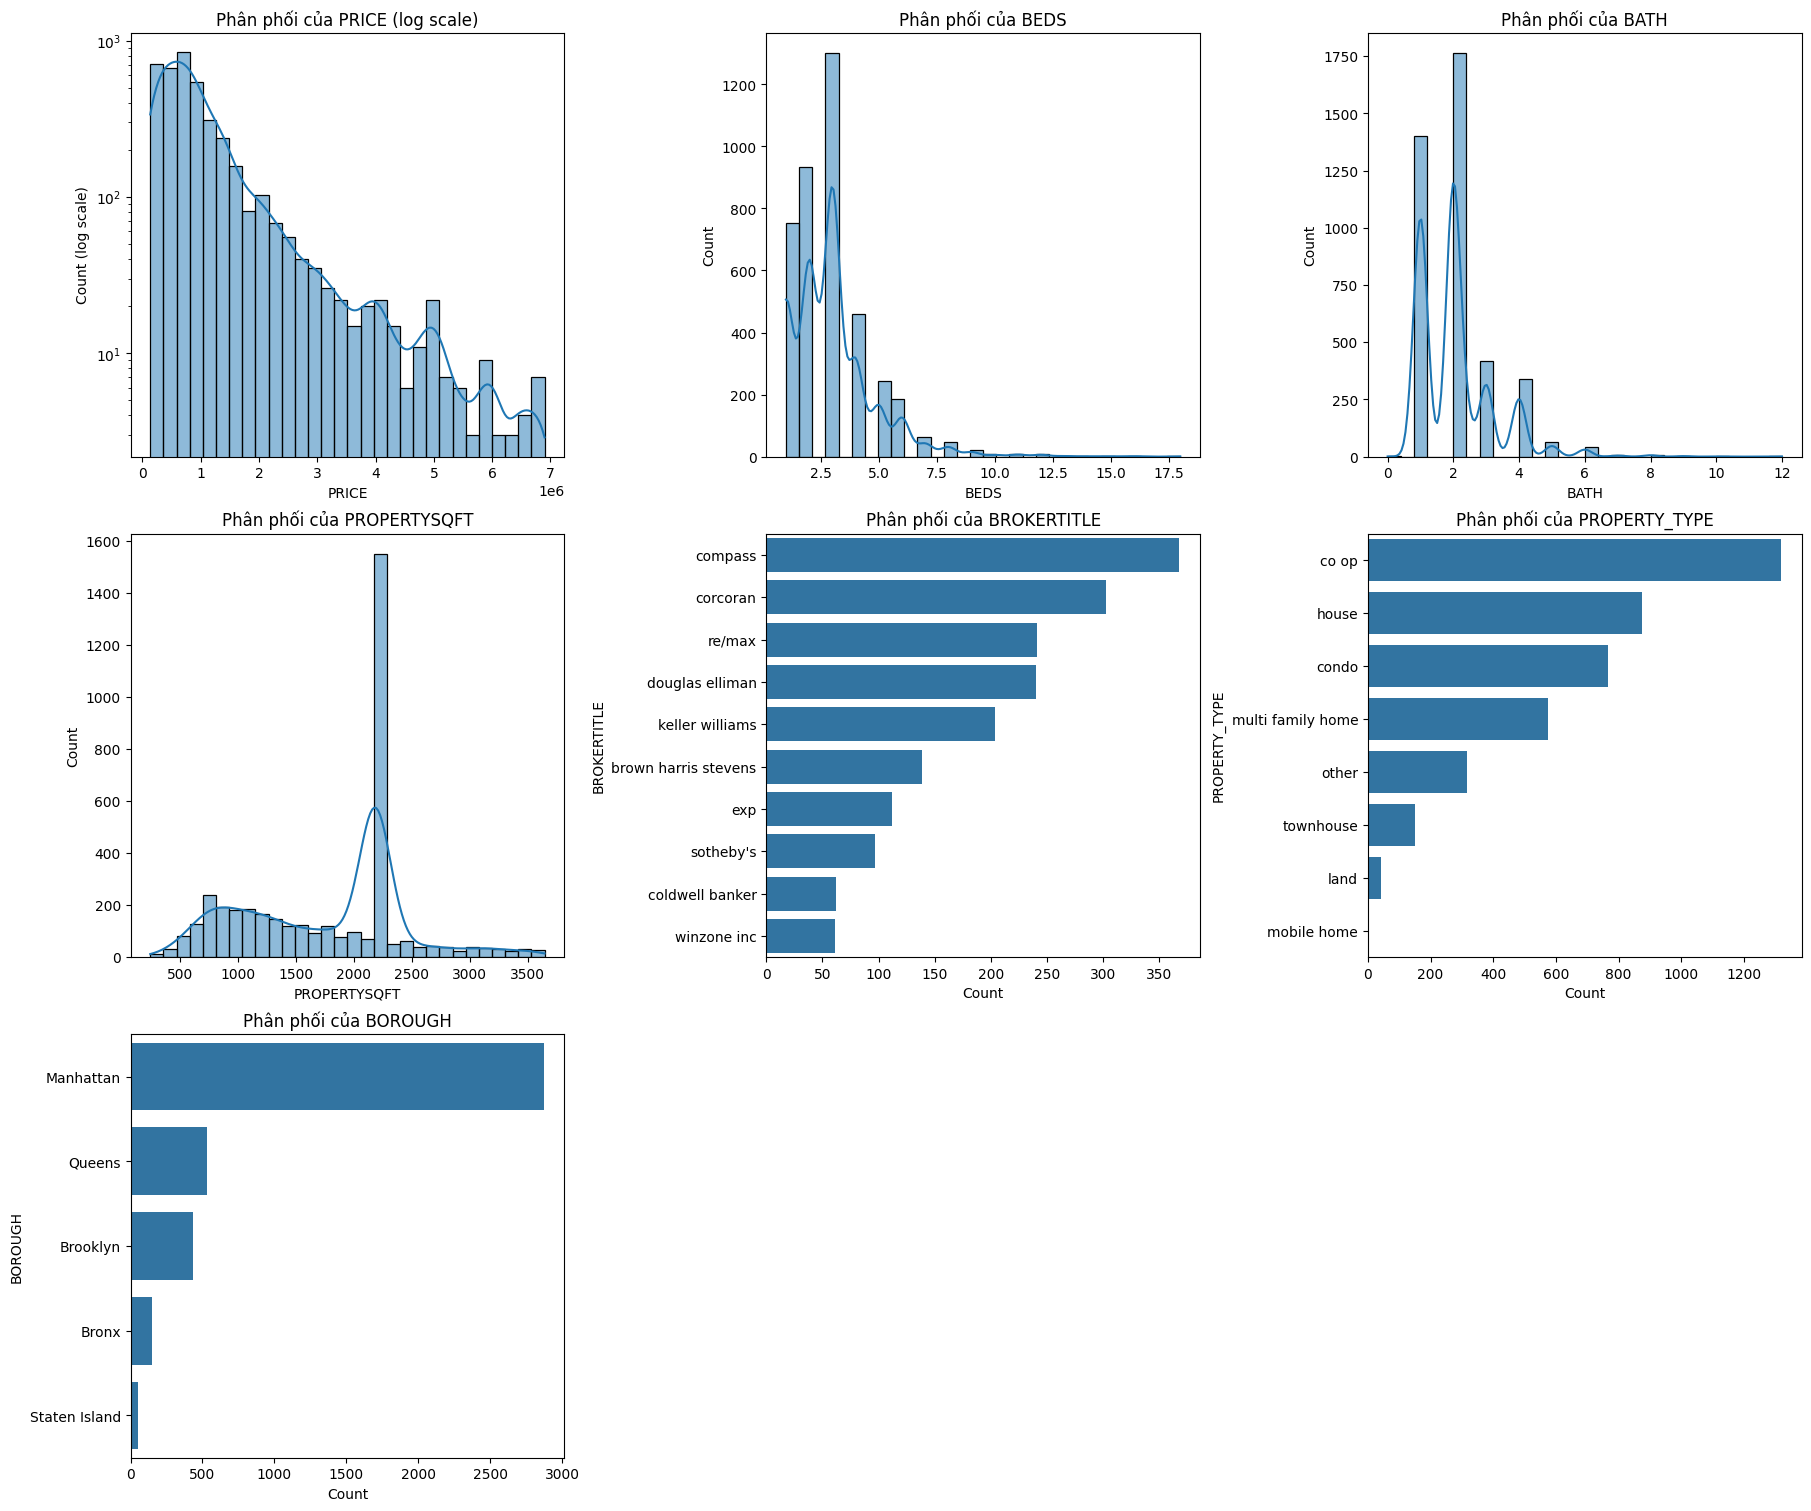

In [149]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log') 
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column} (log scale)')
            ax.set_ylabel('Count (log scale)')
        else:
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh s√°ch c√°c c·ªôt
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# V·∫Ω bi·ªÉu ƒë·ªì theo l∆∞·ªõi 3 c·ªôt
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# V·∫Ω t·ª´ng c·ªôt
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_normal, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [174]:
df = df_normal[df_normal['PROPERTYSQFT'] == 2184.207862]
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
co op                688
house                248
multi family home    234
condo                108
other                 98
townhouse             43
land                  42
mobile home            1
Name: count, dtype: int64


## 1. Ph√¢n ph·ªëi gi√° nh√† (PRICE)
- Gi√° nh√† ph√¢n b·ªë **l·ªách ph·∫£i m·∫°nh** (right-skewed).  
- Hai c·ª•m gi√° ch√≠nh xu·∫•t hi·ªán:
  - **0.5M ‚Äì 1M USD**: chi·∫øm ƒëa s·ªë.
  - **1.5M ‚Äì 2M USD**: t·∫°o th√†nh c·ª•m ph·ª•, th∆∞·ªùng l√† cƒÉn h·ªô/townhouse ·ªü Manhattan ho·∫∑c Brooklyn.  
- Gi√° tr√™n 2.5M gi·∫£m d·∫ßn nh∆∞ng v·∫´n c√≥ m·ªôt s·ªë tr∆∞·ªùng h·ª£p cao ƒë·∫øn g·∫ßn 7M (v·∫´n n·∫±m trong ph√¢n kh√∫c Normal, ch∆∞a t√≠nh Luxury).  

## 2. Ph√¢n ph·ªëi s·ªë ph√≤ng ng·ªß (BEDS)
- Ph·∫ßn l·ªõn nh√† c√≥ **2‚Äì3 ph√≤ng ng·ªß**, ƒë√∫ng v·ªõi ph√¢n kh√∫c ƒë·∫°i ch√∫ng.  
- S·ªë l∆∞·ª£ng nh√† t·ª´ 5 ph√≤ng tr·ªü l√™n gi·∫£m m·∫°nh, hi·∫øm g·∫∑p.  

## 3. Ph√¢n ph·ªëi s·ªë ph√≤ng t·∫Øm (BATH)
- T∆∞∆°ng t·ª± ph√≤ng ng·ªß, ph·ªï bi·∫øn nh·∫•t l√† **1‚Äì2 ph√≤ng t·∫Øm**.  
- T·ª´ 4 ph√≤ng t·∫Øm tr·ªü l√™n r·∫•t √≠t ‚Üí ch·ªß y·∫øu thu·ªôc nh√≥m di·ªán t√≠ch l·ªõn, gi√° cao h∆°n.  

## 4. Ph√¢n ph·ªëi di·ªán t√≠ch (PROPERTYSQFT)
- Ph·ªï bi·∫øn trong kho·∫£ng **500 ‚Äì 1500 sqft**, ph√π h·ª£p h·ªô gia ƒë√¨nh nh·ªè/ trung b√¨nh.  
- C√≥ m·ªôt ‚Äúƒëu√¥i d√†i‚Äù v·ªõi di·ªán t√≠ch >2000 sqft, th∆∞·ªùng n·∫±m ·ªü nh√≥m gi√° cao h∆°n.  

## 5. Ph√¢n ph·ªëi theo m√¥i gi·ªõi (BROKERTITLE)
- M·ªôt s·ªë broker l·ªõn chi·∫øm ∆∞u th·∫ø: **RE/MAX, Compass, Corcoran, Douglas Elliman, Keller Williams**.  
- C√°c broker n√†y chi ph·ªëi ph·∫ßn l·ªõn ngu·ªìn cung tr√™n th·ªã tr∆∞·ªùng.  

## 6. Ph√¢n ph·ªëi theo lo·∫°i nh√† (PROPERTY_TYPE)
- Ch·ªß y·∫øu l√† **condo, co-op, house**.  
- C√°c lo·∫°i townhouse, multi-family home, land chi·∫øm t·ª∑ l·ªá nh·ªè h∆°n.  

## 7. Ph√¢n ph·ªëi theo khu v·ª±c (BOROUGH)
- **Manhattan √°p ƒë·∫£o** v·ªÅ s·ªë l∆∞·ª£ng listing.  
- Theo sau l√† **Brooklyn, Queens**, trong khi Bronx v√† Staten Island ch·ªâ chi·∫øm t·ª∑ tr·ªçng nh·ªè.  

---

### üîë Insight ch√≠nh t·ª´ ph√¢n t√≠ch ƒë∆°n bi·∫øn
1. **Gi√° nh√† ph·ªï th√¥ng ·ªü NYC chia l√†m hai c·ª•m ch√≠nh**: 0.5M‚Äì1M v√† 1.5M‚Äì2M.  
2. **2‚Äì3 ph√≤ng ng·ªß, 1‚Äì2 ph√≤ng t·∫Øm, di·ªán t√≠ch 500‚Äì1500 sqft** l√† ƒë·∫∑c tr∆∞ng chung.  
3. **Condo v√† co-op** l√† lo·∫°i h√¨nh chi·∫øm ∆∞u th·∫ø ‚Üí ph·∫£n √°nh nhu c·∫ßu th·ªã tr∆∞·ªùng ƒë√¥ th·ªã.  
4. **Manhattan l√† trung t√¢m** c·ªßa th·ªã tr∆∞·ªùng Normal segment, c·∫£ v·ªÅ s·ªë l∆∞·ª£ng v√† gi√° tr·ªã.  
5. Th·ªã tr∆∞·ªùng b·ªã chi ph·ªëi m·∫°nh b·ªüi **m·ªôt s·ªë broker l·ªõn**.  



## 2.2. Multivariate Analysis

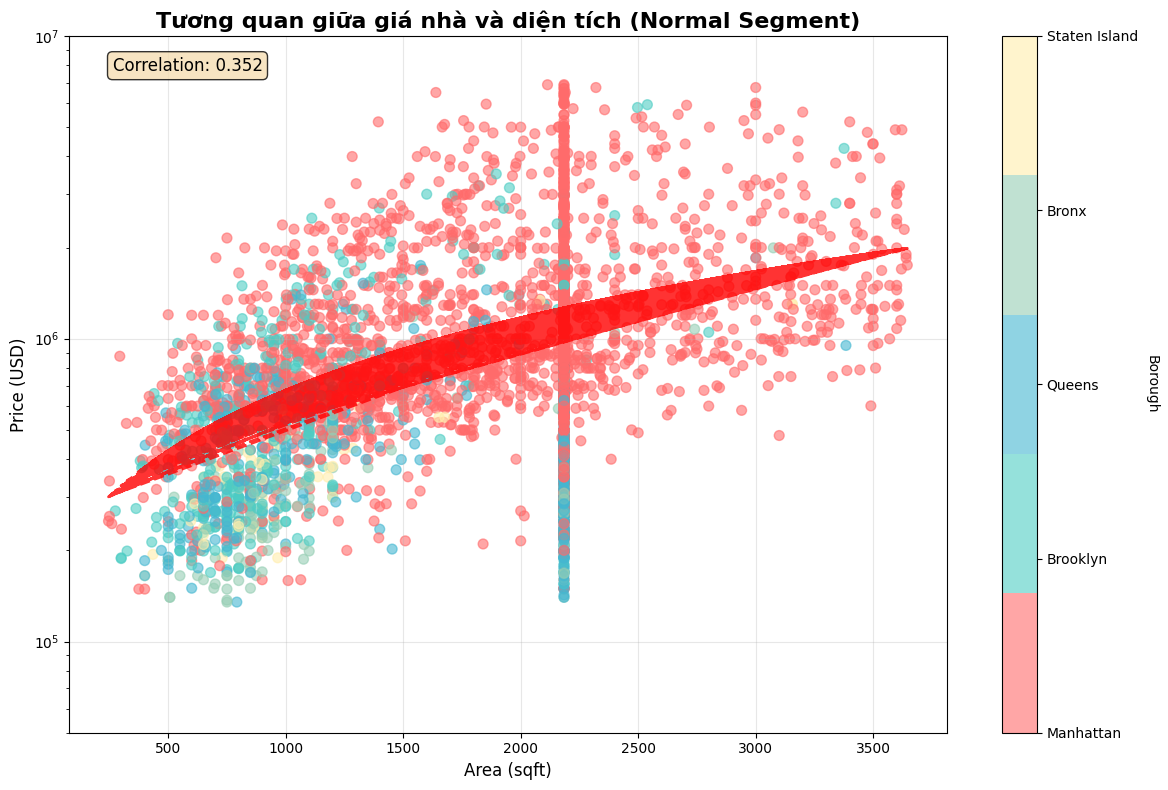

In [150]:
import matplotlib.colors  


# N·∫øu ch·ªâ mu·ªën Manhattan, l·ªçc: df_normal = df_normal[df_normal['BOROUGH'] == 'Manhattan']

borough_mapping = {'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Bronx': 3, 'Staten Island': 4}
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # M√†u c·ªë ƒë·ªãnh

df_normal['BOROUGH_CODE'] = df_normal['BOROUGH'].map(borough_mapping)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_normal['PROPERTYSQFT'], df_normal['PRICE'], alpha=0.6, 
                      c=df_normal['BOROUGH_CODE'], cmap=matplotlib.colors.ListedColormap(colors), s=50)

# Th√™m ƒë∆∞·ªùng xu h∆∞·ªõng
z = np.polyfit(df_normal['PROPERTYSQFT'], df_normal['PRICE'], 1)
p = np.poly1d(z)
plt.plot(df_normal['PROPERTYSQFT'], p(df_normal['PROPERTYSQFT']), "r--", alpha=0.8, linewidth=2)

# Th√™m h·ªá s·ªë t∆∞∆°ng quan
correlation = df_normal[['PROPERTYSQFT', 'PRICE']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Th√™m colorbar v·ªõi nh√£n r·ªùi r·∫°c
cbar = plt.colorbar(scatter, ticks=range(len(borough_mapping)))
cbar.set_ticklabels(list(borough_mapping.keys()))
cbar.set_label('Borough', rotation=270, labelpad=15)

plt.title('T∆∞∆°ng quan gi·ªØa gi√° nh√† v√† di·ªán t√≠ch (Normal Segment)', fontsize=16, fontweight='bold')
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')
plt.ylim(50000, 10000000)
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

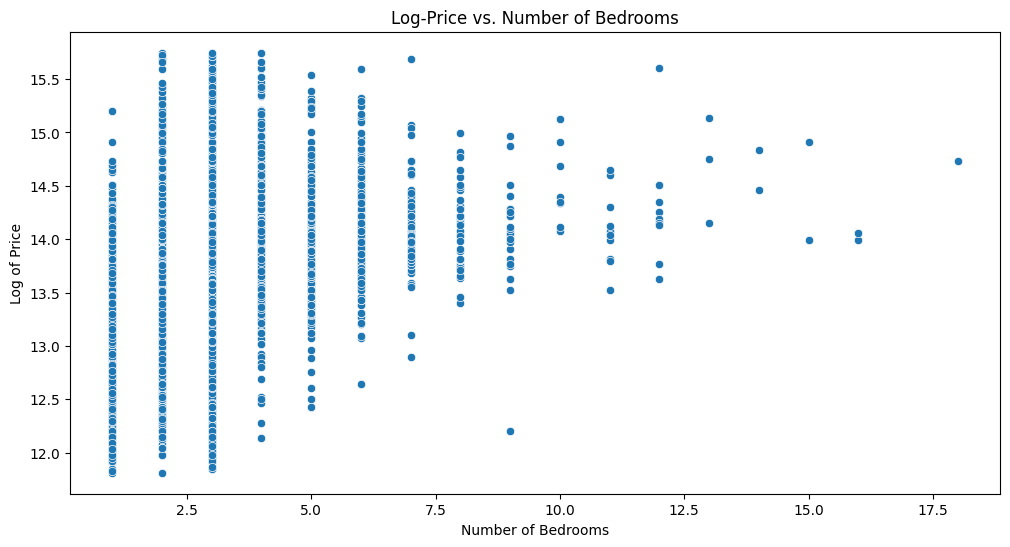

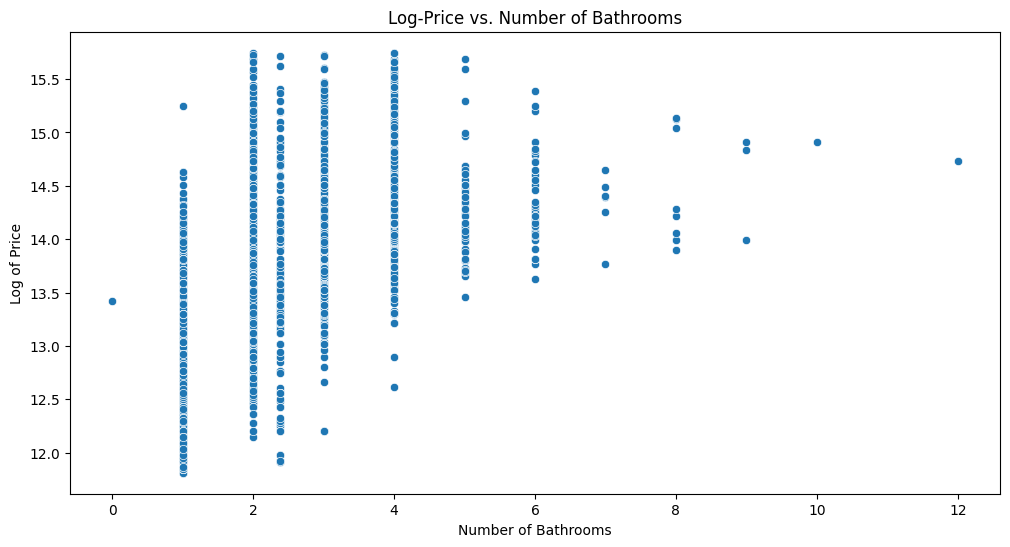

0.3983014579304214 0.573795516876969


In [151]:
df_normal['LOG_PRICE'] = np.log(df_normal['PRICE'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BEDS', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log of Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BATH', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log of Price')
plt.show()

beds_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BEDS'])
bath_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BATH'])

print(beds_log_price_corr, bath_log_price_corr)

In [152]:
import plotly.express as px

fig1 = px.scatter(df_normal, x='BEDS', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BEDS': 'Number of Bedrooms'},
                  title='Price vs. Number of Bedrooms')
fig1.show()

fig2 = px.scatter(df_normal, x='BATH', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BATH': 'Number of Bathrooms'},
                  title='Price vs. Number of Bathrooms')
fig2.show()

S·ªë ph√≤ng l√† y·∫øu t·ªë quan tr·ªçng nh∆∞ng kh√¥ng quy·∫øt ƒë·ªãnh duy nh·∫•t gi√° nh√†.

In [153]:

average_price_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False)

total_listings_per_broker = df_normal['BROKERTITLE'].value_counts()

price_range_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].agg(['min', 'max', 'median']).sort_values(by='median', ascending=False)

# Displaying the results
print("C√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung v·ªã cao nh·∫•t:")
print(price_range_per_broker.head())

print("\nC√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung b√¨nh cao nh·∫•t:")
print(average_price_per_broker.head())

print("\nC√°c nh√† m√¥i gi·ªõi c√≥ nhi·ªÅu ni√™m y·∫øt nh·∫•t:")
print(total_listings_per_broker.head())

C√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung v·ªã cao nh·∫•t:
                                min      max     median
BROKERTITLE                                            
dolly lenz real estate      6500000  6500000  6500000.0
nest seekers  internationa  5999000  5999000  5999000.0
industrie rential           4895000  4895000  4895000.0
onekey mls realmart         4680000  4680000  4680000.0
landair property advisors   2200000  6100000  4150000.0

C√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung b√¨nh cao nh·∫•t:
BROKERTITLE
dolly lenz real estate        6500000.0
nest seekers  internationa    5999000.0
industrie rential             4895000.0
onekey mls realmart           4680000.0
landair property advisors     4150000.0
Name: PRICE, dtype: float64

C√°c nh√† m√¥i gi·ªõi c√≥ nhi·ªÅu ni√™m y·∫øt nh·∫•t:
BROKERTITLE
compass            368
corcoran           303
re/max             241
douglas elliman    240
keller williams    204
Name: count, dtype: int64


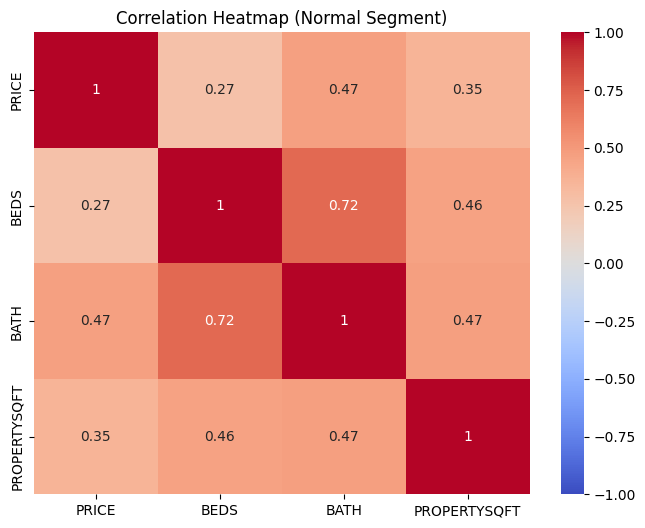

In [154]:
numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
df_numeric = df_normal[numeric_cols].dropna()

# T√≠nh ma tr·∫≠n t∆∞∆°ng quan
corr_matrix = df_numeric.corr()

# V·∫Ω heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap (Normal Segment)')
plt.show()


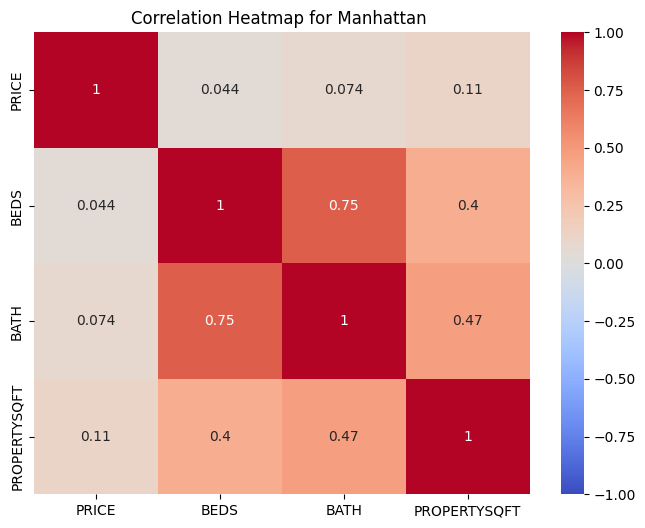

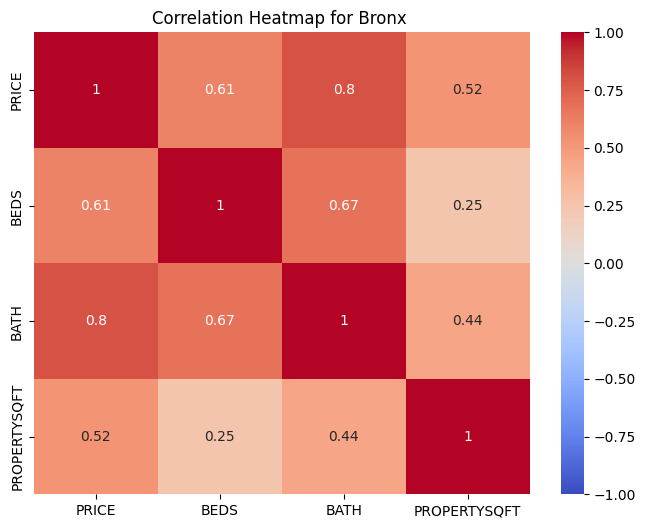

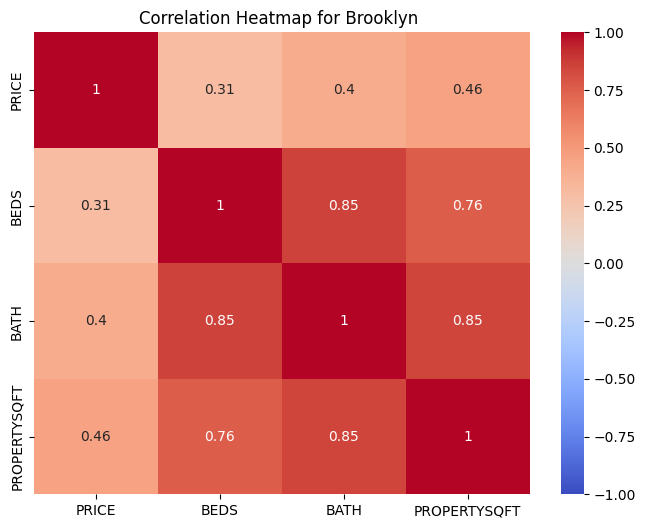

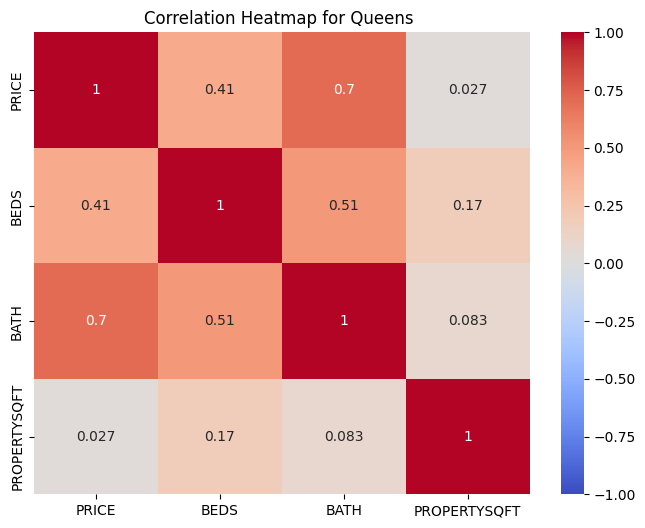

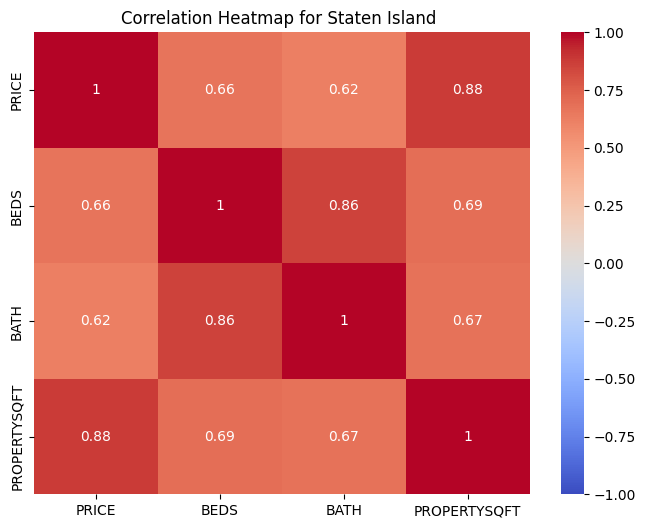

In [155]:
boroughs = df['BOROUGH'].unique()

# V√≤ng l·∫∑p qua t·ª´ng qu·∫≠n ƒë·ªÉ v·∫Ω heatmap
for borough in boroughs:
    # L·ªçc d·ªØ li·ªáu theo qu·∫≠n
    df_borough = df[df['BOROUGH'] == borough]
    
    # Ch·ªçn c√°c c·ªôt s·ªë
    numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
    df_numeric = df_borough[numeric_cols].dropna()  # Lo·∫°i b·ªè gi√° tr·ªã NaN
    
    # T√≠nh ma tr·∫≠n t∆∞∆°ng quan
    corr_matrix = df_numeric.corr()
    
    # V·∫Ω heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Heatmap for {borough} ')
    plt.show()

In [156]:
import plotly.express as px

fig = px.scatter_mapbox(df_normal, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\784580992.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [157]:
df_normal['BROKERTITLE'] = df_normal['BROKERTITLE'].str.replace("Brokered by ", "")

top_brokers = df_normal['BROKERTITLE'].value_counts().nlargest(10).reset_index()
top_brokers.columns = ['BROKERTITLE', 'LISTINGS_COUNT']

fig = px.bar(top_brokers, x='BROKERTITLE', y='LISTINGS_COUNT',
             title=" C√°c nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu theo s·ªë l∆∞·ª£ng ni√™m y·∫øt",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker'})
fig.show()

In [158]:
top_10_brokers_list = top_brokers['BROKERTITLE'].tolist()
average_price_top_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)].groupby('BROKERTITLE')['PRICE'].mean().reset_index()

fig = px.bar(average_price_top_brokers, x='BROKERTITLE', y='PRICE',
             title="Gi√° trung b√¨nh c·ªßa c√°c ƒë∆°n v·ªã ƒë∆∞·ª£c m√¥i gi·ªõi b·ªüi 10 nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu    ",
             labels={'PRICE': 'Average Price', 'BROKERTITLE': 'Broker'})
fig.show()

In [159]:
import plotly.express as px


broker_locality_counts = df_normal.groupby(['BROKERTITLE', 'BOROUGH']).size().reset_index(name='LISTINGS_COUNT')

broker_locality_counts_top_10 = broker_locality_counts[broker_locality_counts['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.bar(broker_locality_counts_top_10, x='BROKERTITLE', y='LISTINGS_COUNT', color='BOROUGH',
             title="Ph√¢n b·ªë ƒë·ªãa l√Ω c·ªßa 10 nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu tr√™n kh·∫Øp c√°c ƒë·ªãa ph∆∞∆°ng kh√°c nhau",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker', 'BOROUGH': 'Locality'})
fig.show()

In [160]:
df_top_10_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.scatter_mapbox(df_top_10_brokers, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="BROKERTITLE", 
                        size="PRICE",
                        hover_data=['PRICE', 'BOROUGH'],
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron",
                        title="Ph√¢n b·ªë ƒë·ªãa l√Ω c·ªßa 10 nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu")

fig.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\4247372228.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [161]:
df_top_10_brokers_properties = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

broker_property_characteristics_top_10 = df_top_10_brokers_properties.groupby('BROKERTITLE').agg({
    'PROPERTYSQFT': 'mean',  
    'BEDS': 'mean',          
    'BATH': 'mean',          
}).reset_index()

print(broker_property_characteristics_top_10)

            BROKERTITLE  PROPERTYSQFT      BEDS      BATH
0  brown harris stevens   1787.224273  2.517986  1.964903
1       coldwell banker   1823.239034  3.096774  2.161290
2               compass   1819.313201  2.467391  1.834545
3              corcoran   1682.658081  2.389439  1.896426
4       douglas elliman   1791.843210  2.554167  1.894782
5                   exp   1689.950039  3.267857  2.024533
6       keller williams   1798.636648  2.965686  1.897655
7                re/max   1676.667303  3.365145  2.246327
8             sotheby's   1984.709369  2.659794  2.124965
9           winzone inc   1847.246361  3.196721  1.924162


## luxury analyst


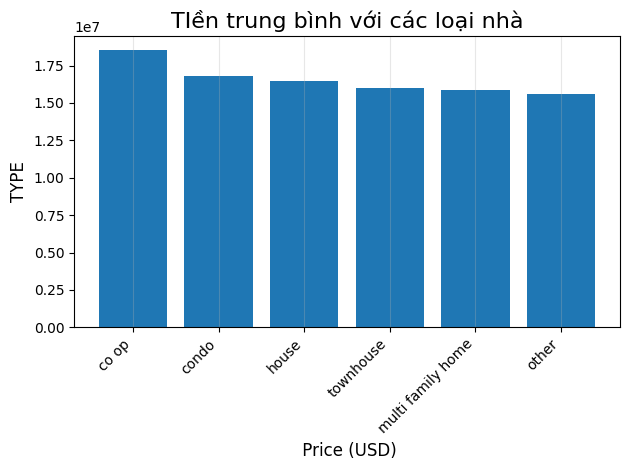

In [162]:
avg_type = df_luxury.groupby("PROPERTY_TYPE")['PRICE'].mean().reset_index()
avg_type = avg_type.sort_values(by = "PRICE",ascending=False)
avg_type
plt.bar(avg_type['PROPERTY_TYPE'],avg_type['PRICE'])
plt.xticks(rotation=45, ha='right')
plt.title('TI·ªÅn trung b√¨nh v·ªõi c√°c lo·∫°i nh√†', fontsize=16)
plt.xlabel(' Price (USD)', fontsize=12)
plt.ylabel('TYPE', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

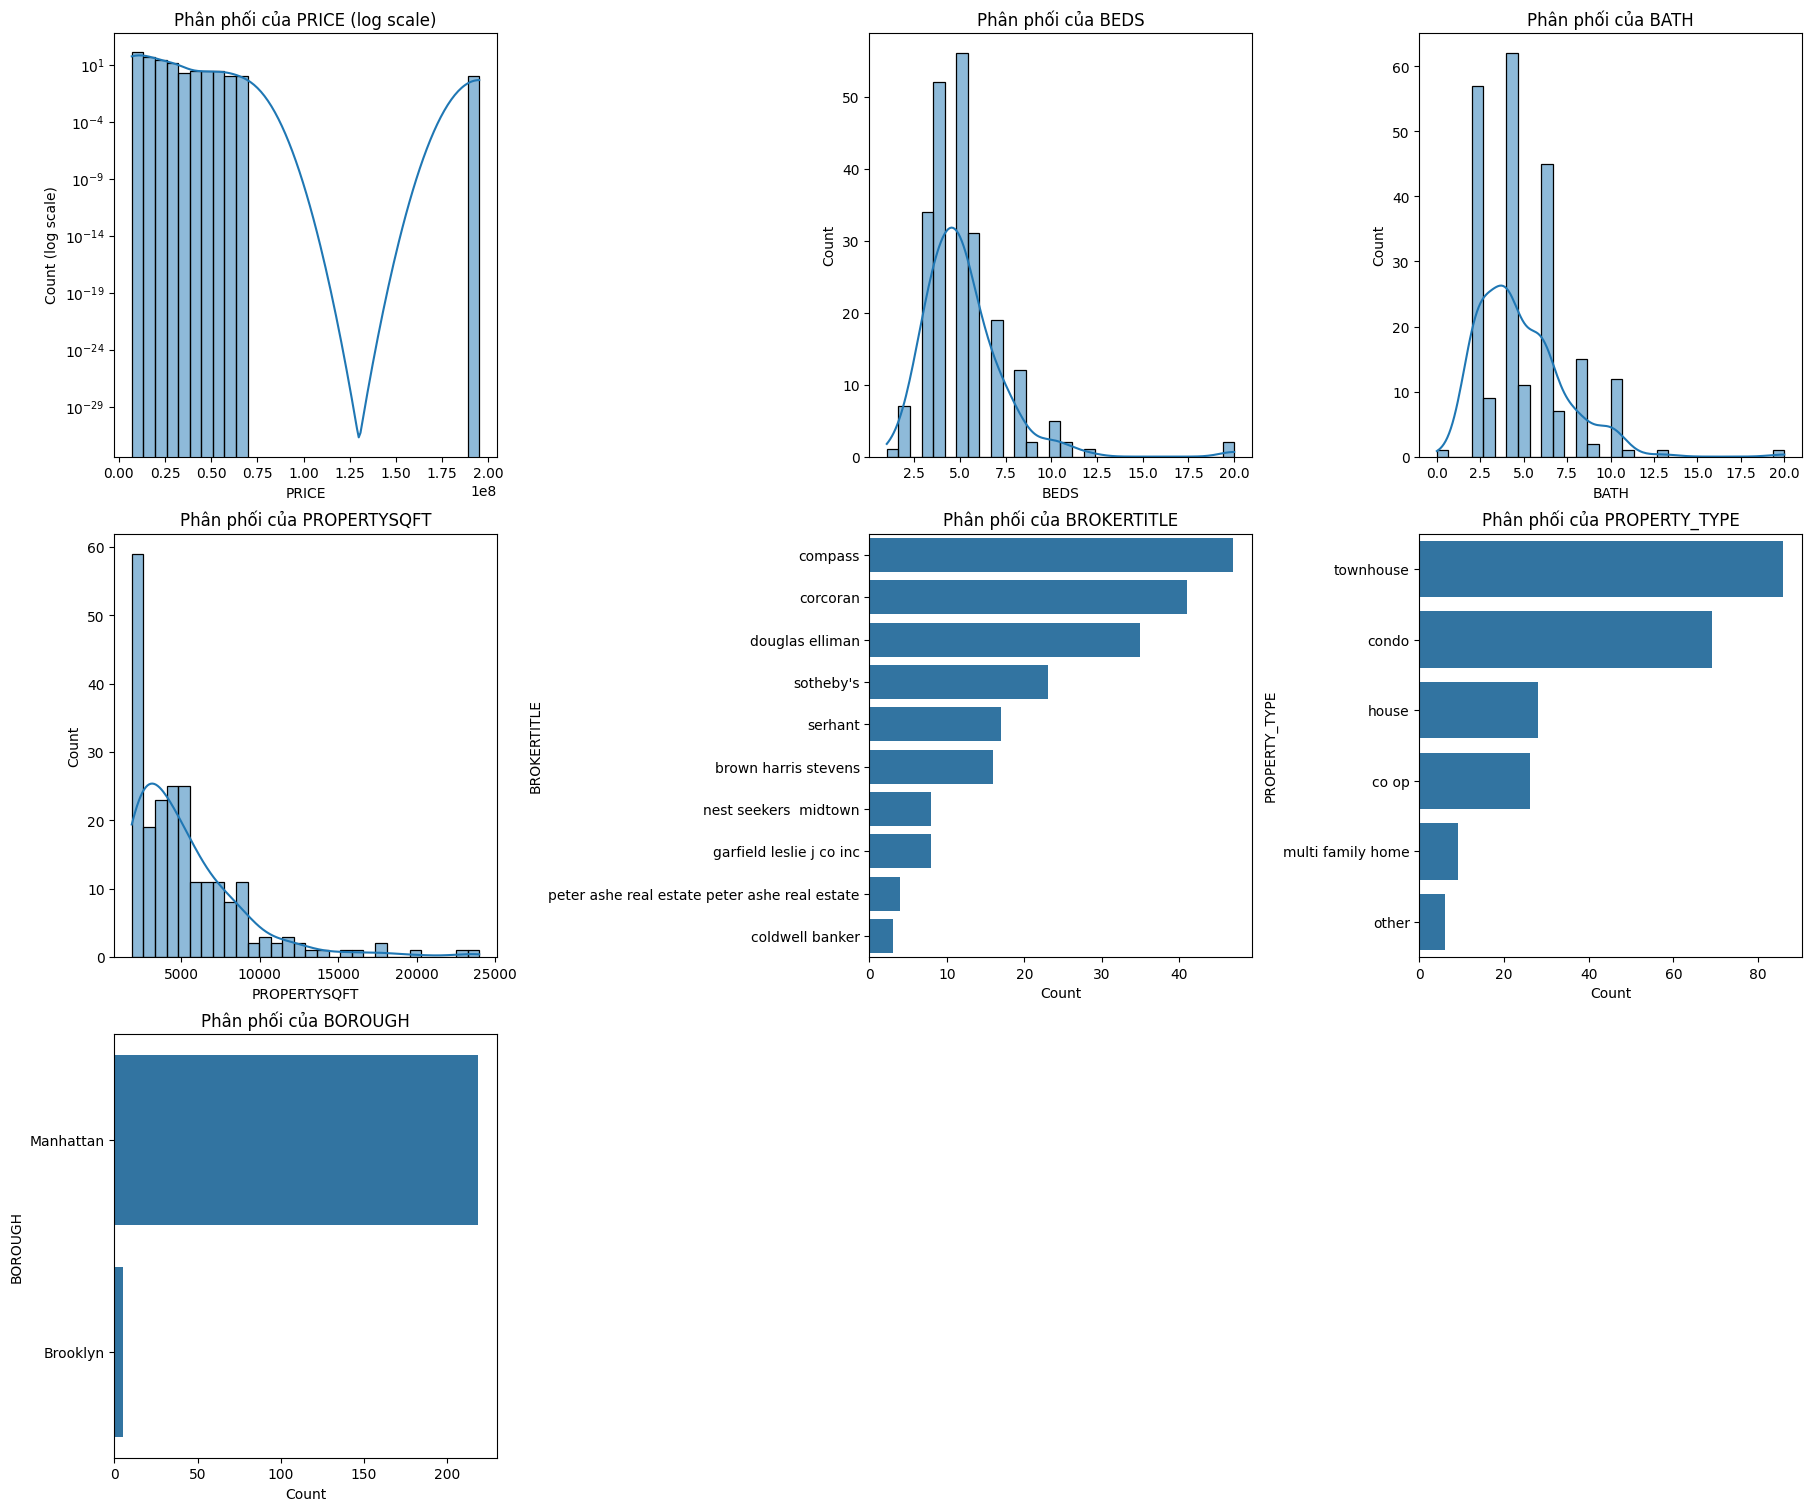

In [163]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log') 
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column} (log scale)')
            ax.set_ylabel('Count (log scale)')
        else:
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh s√°ch c√°c c·ªôt
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# V·∫Ω bi·ªÉu ƒë·ªì theo l∆∞·ªõi 3 c·ªôt
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# V·∫Ω t·ª´ng c·ªôt
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_luxury, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### 1. Ph√¢n ph·ªëi gi√° nh√† (PRICE)
- Gi√° nh√† luxury tr·∫£i r·ªông t·ª´ **5M ƒë·∫øn g·∫ßn 200M USD**.  
- Ph√¢n ph·ªëi l·ªách ph·∫£i, nh∆∞ng kh√°c v·ªõi Normal, ph·∫ßn ƒëu√¥i k√©o d√†i t·ªõi h√†ng trƒÉm tri·ªáu USD.  
- Xu·∫•t hi·ªán r√µ r·ªát m·ªôt s·ªë **cƒÉn si√™u sang (super luxury)** tr√™n 50M, k√©o trung b√¨nh gi√° l√™n cao.  

### 2. Ph√¢n ph·ªëi s·ªë ph√≤ng ng·ªß (BEDS)
- Ph·ªï bi·∫øn t·ª´ **3‚Äì6 ph√≤ng ng·ªß**.  
- Xu·∫•t hi·ªán m·ªôt s·ªë cƒÉn bi·ªát th·ª±/townhouse c√≥ **10+ ph√≤ng ng·ªß**, hi·∫øm nh∆∞ng ƒë·∫∑c tr∆∞ng cho ph√¢n kh√∫c n√†y.  

### 3. Ph√¢n ph·ªëi s·ªë ph√≤ng t·∫Øm (BATH)
- ƒêa s·ªë c√≥ **3‚Äì6 ph√≤ng t·∫Øm**, ƒëi k√®m v·ªõi s·ªë ph√≤ng ng·ªß l·ªõn.  
- M·ªôt s·ªë √≠t tr∆∞·ªùng h·ª£p c·ª±c ƒëoan c√≥ tr√™n 10 ph√≤ng t·∫Øm ‚Üí bi·ªát th·ª± ho·∫∑c cƒÉn h·ªô penthouse nhi·ªÅu t·∫ßng.  

### 4. Ph√¢n ph·ªëi di·ªán t√≠ch (PROPERTYSQFT)
- Luxury ch·ªß y·∫øu t·ª´ **3,000 ‚Äì 10,000 sqft**.  
- M·ªôt s·ªë cƒÉn c·ª±c l·ªõn tr√™n **20,000 sqft**, th∆∞·ªùng l√† bi·ªát th·ª± ho·∫∑c penthouse.  

### 5. Ph√¢n ph·ªëi theo m√¥i gi·ªõi (BROKERTITLE)
- **Compass, Douglas Elliman, Corcoran** d·∫´n ƒë·∫ßu s·ªë l∆∞·ª£ng listing luxury.  
- C√°c m√¥i gi·ªõi chuy√™n ph√¢n kh√∫c cao c·∫•p kh√°c: **Serhant, Sotheby‚Äôs, Brown Harris Stevens**.  
- Th·ªã tr∆∞·ªùng luxury t·∫≠p trung trong tay m·ªôt s·ªë √≠t broker uy t√≠n, mang t√≠nh chuy√™n bi·ªát cao.  

### 6. Ph√¢n ph·ªëi theo lo·∫°i nh√† (PROPERTY_TYPE)
- Luxury t·∫≠p trung nhi·ªÅu nh·∫•t v√†o **condo cao c·∫•p v√† townhouse**.  
- House ƒë∆°n l·∫≠p v√† co-op c√≥ nh∆∞ng √≠t h∆°n.  
- Multi-family home h·∫ßu nh∆∞ kh√¥ng xu·∫•t hi·ªán trong luxury.  

### 7. Ph√¢n ph·ªëi theo khu v·ª±c (BOROUGH)
- **Manhattan √°p ƒë·∫£o g·∫ßn nh∆∞ tuy·ªát ƒë·ªëi**, ch·ªâ m·ªôt ph·∫ßn r·∫•t nh·ªè luxury ·ªü Brooklyn.  
- Kh√¥ng c√≥ luxury ·ªü Queens, Bronx hay Staten Island.  

---

#### üîë Insight ch√≠nh t·ª´ ph√¢n t√≠ch ƒë∆°n bi·∫øn Luxury Segment
1. **Luxury ·ªü NYC g·∫ßn nh∆∞ ƒë·ªìng nghƒ©a v·ªõi Manhattan**, n∆°i t·∫≠p trung to√†n b·ªô ngu·ªìn cung cao c·∫•p.  
2. Gi√° dao ƒë·ªông r·ªông, t·ª´ **5M ‚Äì 200M USD**, v·ªõi m·ªôt s·ªë si√™u ph·∫©m k√©o ph√¢n ph·ªëi l√™n c·ª±c ƒëoan.  
3. ƒê·∫∑c ƒëi·ªÉm cƒÉn h·ªô luxury: **di·ªán t√≠ch l·ªõn (3,000‚Äì10,000 sqft), nhi·ªÅu ph√≤ng (3‚Äì6 ph√≤ng ng·ªß, 3‚Äì6 ph√≤ng t·∫Øm)**.  
4. Th·ªã tr∆∞·ªùng ƒë∆∞·ª£c chi ph·ªëi b·ªüi **m·ªôt nh√≥m broker cao c·∫•p**, n·ªïi b·∫≠t l√† Compass, Douglas Elliman, Corcoran, Serhant v√† Sotheby‚Äôs.  
5. **Condo & townhouse** l√† h√¨nh th·ª©c ch√≠nh c·ªßa luxury, ph·∫£n √°nh ƒë·∫∑c th√π ƒë√¥ th·ªã Manhattan.  

‚û°Ô∏è Luxury segment t·∫°i NYC c√≥ t√≠nh t·∫≠p trung c·ª±c cao v·ªÅ c·∫£ **ƒë·ªãa l√Ω (Manhattan)** l·∫´n **broker**. ƒê√¢y l√† th·ªã tr∆∞·ªùng kh√°c bi·ªát ho√†n to√†n so v·ªõi Normal segment, ph·ª•c v·ª• nh√≥m kh√°ch h√†ng si√™u gi√†u.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\1141401786.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



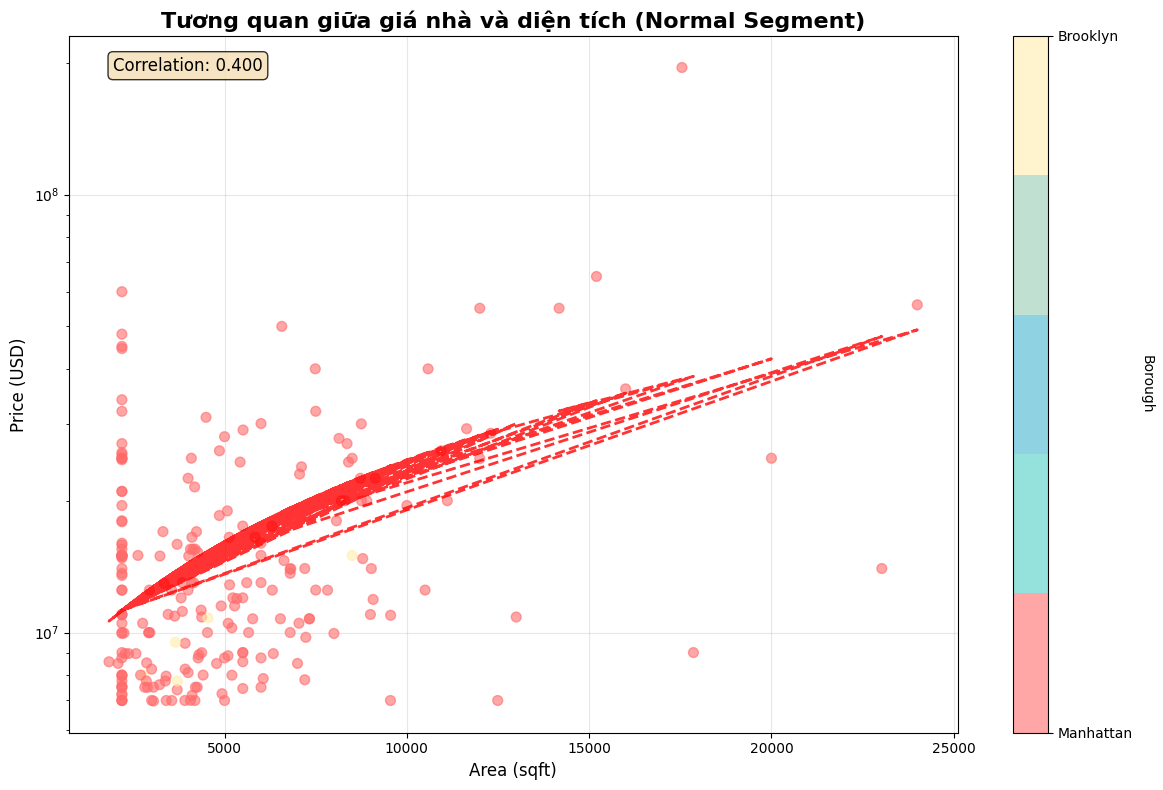

In [164]:


# N·∫øu ch·ªâ mu·ªën Manhattan, l·ªçc: df_normal = df_normal[df_normal['BOROUGH'] == 'Manhattan']

borough_mapping = {'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Bronx': 3, 'Staten Island': 4}
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # M√†u c·ªë ƒë·ªãnh

df_luxury['BOROUGH_CODE'] = df_luxury['BOROUGH'].map(borough_mapping)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_luxury['PROPERTYSQFT'], df_luxury['PRICE'], alpha=0.6, 
                      c=df_luxury['BOROUGH_CODE'], cmap=matplotlib.colors.ListedColormap(colors), s=50)

# Th√™m ƒë∆∞·ªùng xu h∆∞·ªõng
z = np.polyfit(df_luxury['PROPERTYSQFT'], df_luxury['PRICE'], 1)
p = np.poly1d(z)
plt.plot(df_luxury['PROPERTYSQFT'], p(df_luxury['PROPERTYSQFT']), "r--", alpha=0.8, linewidth=2)

# Th√™m h·ªá s·ªë t∆∞∆°ng quan
correlation = df_luxury[['PROPERTYSQFT', 'PRICE']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Th√™m colorbar v·ªõi nh√£n r·ªùi r·∫°c
cbar = plt.colorbar(scatter, ticks=range(len(borough_mapping)))
cbar.set_ticklabels(list(borough_mapping.keys()))
cbar.set_label('Borough', rotation=270, labelpad=15)

plt.title('T∆∞∆°ng quan gi·ªØa gi√° nh√† v√† di·ªán t√≠ch (Normal Segment)', fontsize=16, fontweight='bold')
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')
# plt.ylim(50000, 10000000)
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\3798432295.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



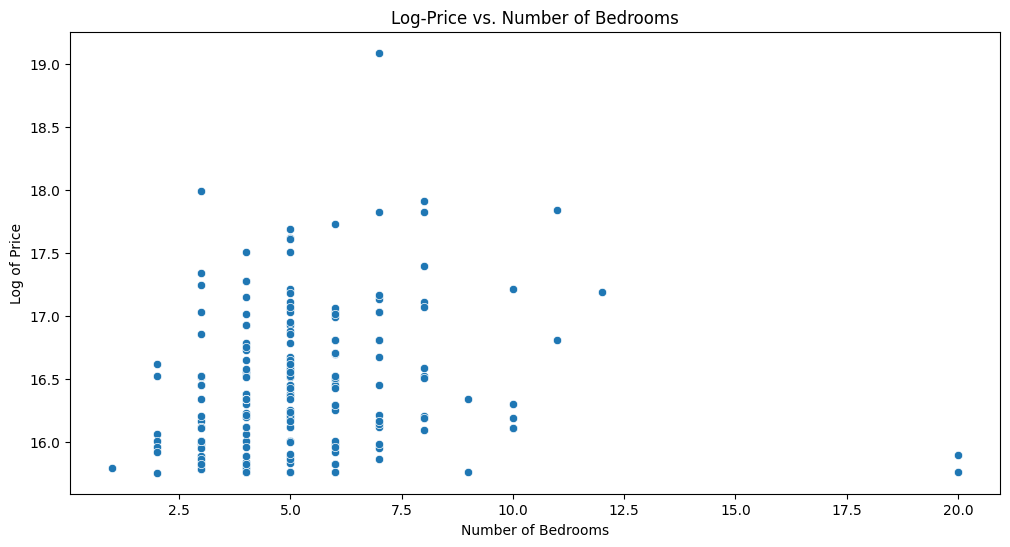

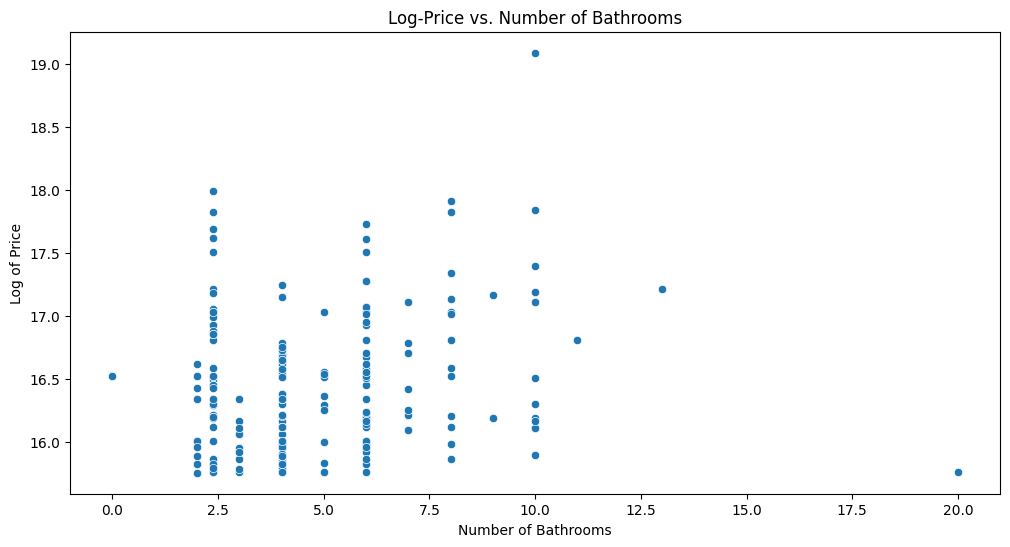

0.16176406731202345 0.20058720278501338


In [165]:
df_luxury['LOG_PRICE'] = np.log(df_luxury['PRICE'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BEDS', y='LOG_PRICE', data=df_luxury)
plt.title('Log-Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log of Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BATH', y='LOG_PRICE', data=df_luxury)
plt.title('Log-Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log of Price')
plt.show()

beds_log_price_corr = df_luxury['LOG_PRICE'].corr(df_luxury['BEDS'])
bath_log_price_corr = df_luxury['LOG_PRICE'].corr(df_luxury['BATH'])

print(beds_log_price_corr, bath_log_price_corr)

In [166]:
import plotly.express as px

fig = px.scatter_mapbox(df_luxury, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\1400820636.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

